<a href="https://colab.research.google.com/github/dyong00/2020-2-AI/blob/master/code/06_neuron_activation_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

# 활성화 함수

In [ ]:
import numpy as np
np.e

2.718281828459045

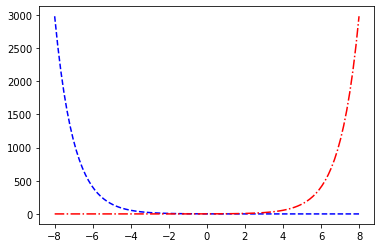

In [ ]:
import numpy as np
import matplotlib.pylab as plt #pyplot도 괜찮

plt.figure(figsize = (6, 4))
x = np.linspace(-8, 8, 100) #-8에서 8까지 100등분을 해 그 값들을 배열로 만듬
plt.plot(x, np.exp(-x), 'b--') #e의 -x 승 > exp 
_= plt.plot(x, np.exp(x), 'r-.') #e의 x 승

# 시그모이드 함수

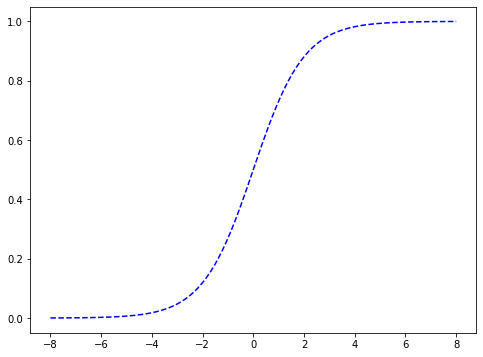

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigm_func(x):  # sigmoid 함수 : s자 곡선 / 0과 1사이의 값인 함수 
    return 1 / ( 1 + np.exp(-x)) #1분의 1+ e의 -x 승

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100) #-8에서 8까지 100등분을 해 그 값들을 배열로 만듬
plt.plot(x, sigm_func(x), 'b--') #sigmoid 함수를 적용해 blue로 그려라

# ReLU 함수

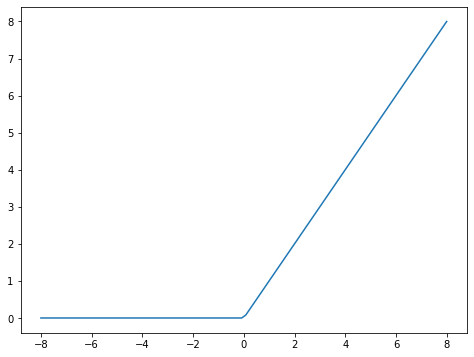

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu_func(x):  # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수 앵수면 x, 음수면 0
    return np.maximum(0, x) #max대신 maximum
    #return (x>0)*x   # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

# 시그모이드 ReLU 함께 그리기

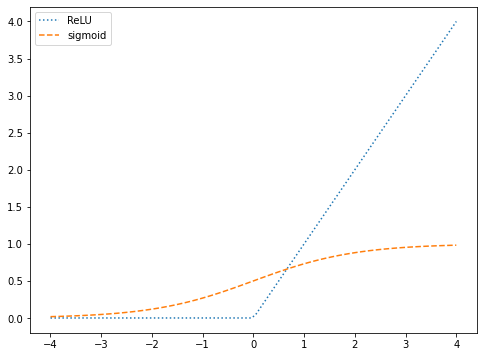

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU(Rectified Linear Unit: 정류된 선형 유닛) 함수
def relu_func(x):
    return np.maximum(0, x)
    #return (x>0)*x   # same

def sigm_func(x):  # sigmoid 함수
    return 1 / ( 1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU") #파란색
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid") # 주황색
plt.legend(loc='upper left') #왼쪽 상단에 범례를 삽입

# 다양한 활성화 함수

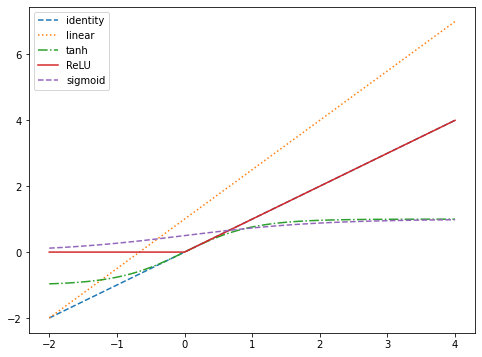

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def identity_func(x):  #항등함수 identity 활성화 함수
    return x

def linear_func(x):   # 1차 함수 선형함수 identity에서 변형
    return 1.5 * x + 1    #  a 기울기(1.5),  y절편b(1) 조정가능

def tanh_func(x):    # TanH 함수
    return np.tanh(x) #numpy에 정의됨!

def relu_func(x):   # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x)
    #return (x>0)*x   # same

def sigm_func(x):  # sigmoid 함수
    return 1 / ( 1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-2, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

# 뉴런의 행렬 연산

In [ ]:
x = [[1, 2]] #amtmul을 하기 위해 2차원으로 1행 2열
w = [[1, 2, 3], [4, 5, 6]] #2행 3열

y = tf.matmul(x, w) #1행 3열
y.numpy()

array([[ 9, 12, 15]], dtype=int32)

# 특징 2, 샘플 수 4개의 행렬 연산

In [ ]:
x = [[6, 5]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48]], dtype=int32)

In [ ]:
x = [[6, 5], [4, 7], [5, 6], [6, 7]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48],
       [32, 43, 54],
       [29, 40, 51],
       [34, 47, 60]], dtype=int32)

# 행렬의 순서를 바꾼 계산

In [ ]:
# x = [[6, 5], [4, 7], [5, 6], [6, 7]]
# w = [[1, 2, 3], [4, 5, 6]]

x = [[6, 4, 5, 6], [5, 7, 6, 7]]
w = [[1, 4], [2, 5], [3, 6]]

y = tf.matmul(w, x)
y.numpy()

array([[26, 32, 29, 34],
       [37, 43, 40, 47],
       [48, 54, 51, 60]], dtype=int32)

# AND 게이트 구현

In [ ]:
# tf.keras를 이용한 AND 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) #입력 4행 2열
y = np.array([[1], [0], [0], [0]]) #출력 11일때 1이고 10일때 0이고,,,and게이트 데이터

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)), #결과는 1, input모양은 입력이 2개인 벡터
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse') #lr: 러닝학습
model.summary() # Param #   : 가중치+편향 = 모델이 구해야하는 것

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs=400, batch_size=1) #400번 학습 #변수에 저장해 이 학습을 그릴 수 있음

Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 2/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2745
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 4/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 5/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2539
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 7/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2425
Epoch 8/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2379
Epoch 9/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2328
Epoch 10/400
4/4 [==============================] - 0s 969us/step - loss: 0.2283
Epoch 11/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2245
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2203
Epoch 13/400
4/4 [==============================] - 0s 2ms/

# 손실 값 그래프와 결과 예측

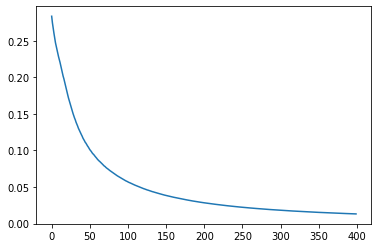

In [ ]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) #에폭값에 대해 손실값이 그래프로 표현

# 가중치와 편향 값 알아보기

In [ ]:
for weight in model.weights:
  print(weight) #고정된 가중치 w1 = 3.7286966 w2= 3.7293887 b = shape=(1,) = 1개 = -5.698811

<tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7286966],
       [3.7293887]], dtype=float32)>
<tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-5.698811], dtype=float32)>


In [ ]:
model.weights[0] #가중치 kernal이 가중치

<tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7286966],
       [3.7293887]], dtype=float32)>

In [ ]:
model.weights[1] #편향 bias가 편향

<tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-5.698811], dtype=float32)>

# OR 게이트 구현

In [ ]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) #input
y = np.array([[1], [1], [1], [0]]) #output

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x, y, epochs=400, batch_size=1) #400번 학습

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
4/4 [==============================] - 0s 1ms/step - loss: 0.3264
Epoch 2/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2628
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 5/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 7/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 8/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1535
Epoch 9/400
4/4 [============

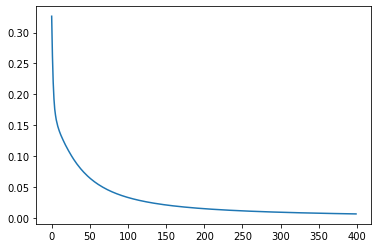

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) #손실값 감소 확인

In [ ]:
model.predict(x) #예측 값

array([[0.9990471 ],
       [0.9240857 ],
       [0.9240196 ],
       [0.12373009]], dtype=float32)

In [ ]:
for weight in model.weights:
  print(weight) #가중치와 편향 값 확인

<tf.Variable 'dense_14/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[4.456771 ],
       [4.4558287]], dtype=float32)>
<tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([-1.9575717], dtype=float32)>


# XOR 구현

In [ ]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) #input
y = np.array([[0], [1], [1], [0]]) #output

model = tf.keras.Sequential([ #xor연산은 2개의 층이 필요함
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
print(model.predict(x))

# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
  print(weight)
# 결과  
# [[0.05737829]
#  [0.9552449 ]
#  [0.95506525]
#  [0.04008079]]
# 가중치 1 2행 2열
# <tf.Variable 'dense_15/kernel:0' shape=(2, 2) dtype=float32, numpy=
# array([[-6.014911, -4.040049],
#        [-5.934563, -4.027282]], dtype=float32)>
# 편향 1
# <tf.Variable 'dense_15/bias:0' shape=(2,) dtype=float32, numpy=array([2.2774637, 5.944905 ], dtype=float32)>
# 가중치 2
# <tf.Variable 'dense_16/kernel:0' shape=(2, 1) dtype=float32, numpy=
# array([[-8.195495],
#        [ 7.923833]], dtype=float32)>
# 편향 2
# <tf.Variable 'dense_16/bias:0' shape=(1,) dtype=float32, numpy=array([-3.645826], dtype=float32)>

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2893
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2831
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2765
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 7/2000
4/4 [=============================

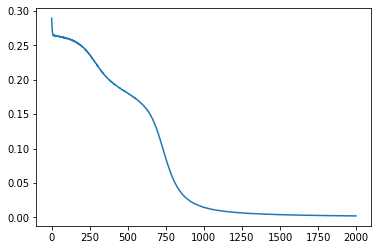

In [ ]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [ ]:
model.predict(x) # 예측 값 

array([[0.05737829],
       [0.9552449 ],
       [0.95506525],
       [0.04008079]], dtype=float32)

In [ ]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
  print(weight)
  print()

<tf.Variable 'dense_15/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-6.014911, -4.040049],
       [-5.934563, -4.027282]], dtype=float32)>

<tf.Variable 'dense_15/bias:0' shape=(2,) dtype=float32, numpy=array([2.2774637, 5.944905 ], dtype=float32)>

<tf.Variable 'dense_16/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-8.195495],
       [ 7.923833]], dtype=float32)>

<tf.Variable 'dense_16/bias:0' shape=(1,) dtype=float32, numpy=array([-3.645826], dtype=float32)>



In [ ]:
model.weights[0] #가중치1

<tf.Variable 'dense_15/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-6.014911, -4.040049],
       [-5.934563, -4.027282]], dtype=float32)>

In [ ]:
model.weights[1]  #편향1

<tf.Variable 'dense_15/bias:0' shape=(2,) dtype=float32, numpy=array([2.2774637, 5.944905 ], dtype=float32)>

In [ ]:
model.weights[2]  #가중치2

<tf.Variable 'dense_16/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-8.195495],
       [ 7.923833]], dtype=float32)>

In [ ]:
model.weights[3] #편향2 

<tf.Variable 'dense_16/bias:0' shape=(1,) dtype=float32, numpy=array([-3.645826], dtype=float32)>